### Experiment : Train RNN variants using w2v skip gram embeddings and best performed paramters
### Objectives

1. Train LSTM model
2. Train GRU model
3. Train Bidirectional model
4. Error analysis on each variant

### Paramerters

RNN - Study statistics: 
  Number of finished trials:  50
Best trial:
  Value:  0.42832933606427764
  Params: 
    layers: 1
    units: 64
    dropout_rates: 0.3
    recurrent_dropout_rates: 0.1
    activation: swish
    spatial_dropout: False
    LR: 0.001

GRU -Study statistics: 
  Number of finished trials:  50
Best trial:
  Value:  0.3807172583165285
  Params: 
    layers: 1
    units: 32
    dropout_rates: 0.3
    recurrent_dropout_rates: 0.1
    activation: relu
    spatial_dropout: False
    LR: 0.001

LSTM - Trial 0 finished with value: 0.3973853744023683 and parameters: {'layers': 1, 'units': 32, 'dropout_rates': 0.3, 'recurrent_dropout_rates': 0.0, 'activation': 'elu', 'spatial_dropout': False, 'LR': 0.001}. Best is trial 0 with value: 0.3973853744023683.
 
BiGRU
 

### Observations

1. 
2. 
3. 

### Solutions and further investigation

1. 
2. 
3. 

#### Load Modeules and datasets

In [1]:
import numpy as np
import random as rn
np.random.seed(0)
rn.seed(0)
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 1000)
# import helper function script
import sys
sys.path.insert(1,'G:\\Github\\Sinhala-Hate-Speech-Detection')
import utills
import TextClassifier


Instructions for updating:
non-resource variables are not supported in the long term


#### Word2vec skipgram

In [2]:
TC = TextClassifier.TextClassifier(EMBEDDING='w2v_skipgram')

Load data

X train (4526,) Y train (4526,) X test (1940,) Y test (1940,)
Build vocab

Load Embedding model

Create embedding index

found 2137729 word vectors
Check coverage
Found embeddings for 93.59% of vocab
Found embeddings for  98.12% of all text
Added 489 words to embedding with longer suffix
Added 29 words to embedding with shorter suffix
2138247
Check coverage
Found embeddings for 96.54% of vocab
Found embeddings for  99.00% of all text
dictionary size:  17577
Embedding matrix 



#### Custom code

In [3]:
def get_model(TC,model_type):
    from tensorflow.python.keras.models import Sequential
    #from tensorflow.keras.optimizers import Adam
    from tensorflow.python.keras.optimizer_v2.adam import Adam
    from tensorflow.python.keras.layers import Dense,Input,SpatialDropout1D,Dropout,Flatten, SimpleRNN,LSTM,RNN,GRU,Bidirectional,Embedding

    print("Build model")
    model = Sequential()
    if(TC.EMBEDDING == None):
        model.add(Embedding(output_dim=TC.EMBEDDING_SIZE, 
                        input_dim=TC.LEN_VOCAB, 
                        input_length=TC.MAX_SEQ_LEN,
                        trainable=TC.trainable))

    else:
        model.add(Embedding(output_dim=TC.EMBEDDING_SIZE, 
                        input_dim=TC.LEN_VOCAB, 
                        input_length=TC.MAX_SEQ_LEN,
                        weights=[TC.emb_matrix], # Additionally we give the Wi
                        trainable=TC.trainable)) # Don't train the embeddings 
   
    # if(spatial_dropout == True):
    #     model.add(SpatialDropout1D(dropout_rate))
    if(model_type=="RNN"):
        if TC.layer!=0:
            for i in range(TC.layer):
                model.add(SimpleRNN(TC.unit, activation=TC.activation,dropout=TC.dropout_rate, recurrent_dropout=TC.recurr_dropout,return_sequences=True))
        model.add(SimpleRNN(TC.unit, activation=TC.activation,dropout=TC.dropout_rate, recurrent_dropout=TC.recurr_dropout))

    elif(model_type == "LSTM"):
        if TC.layer!=0:
            for i in range(TC.layer):
                model.add(LSTM(TC.unit, activation=TC.activation,dropout=TC.dropout_rate, recurrent_dropout=TC.recurr_dropout,return_sequences=True))
        model.add(LSTM(TC.unit, activation=TC.activation,dropout=TC.dropout_rate, recurrent_dropout=TC.recurr_dropout))
    elif(model_type == "GRU"):
        if TC.layer!=0:
            for i in range(TC.layer):
                model.add(GRU(TC.unit, activation=TC.activation,dropout=TC.dropout_rate, recurrent_dropout=TC.recurr_dropout,return_sequences=True))
        model.add(GRU(TC.unit, activation=TC.activation,dropout=TC.dropout_rate, recurrent_dropout=TC.recurr_dropout))
    elif(model_type == "BiLSTM"):
        if TC.layer!=0:
            for i in range(TC.layer):
                model.add(Bidirectional(LSTM(TC.unit, activation=TC.activation,dropout=TC.dropout_rate, recurrent_dropout=TC.recurr_dropout,return_sequences=True)))
        model.add(Bidirectional(LSTM(TC.unit, activation=TC.activation,dropout=TC.dropout_rate, recurrent_dropout=TC.recurr_dropout)))
    elif(model_type == "BiGRU"):
        if TC.layer!=0:
            for i in range(TC.layer):
                model.add(Bidirectional(GRU(TC.unit, activation=TC.activation, dropout=TC.dropout_rate, recurrent_dropout=TC.recurr_dropout,return_sequences=True)))
        model.add(Bidirectional(GRU(TC.unit, activation=TC.activation,dropout=TC.dropout_rate, recurrent_dropout=TC.recurr_dropout)))
    #model.add(Dropout(0.2))
    if TC.layer!=0:
            for i in range(TC.layer):
                model.add(Dense(TC.unit, activation=TC.activation))
                model.add(Dropout(TC.dropout_rate))
    model.add(Dense(TC.unit, activation=TC.activation))
    model.add(Dropout(TC.dropout_rate))
    model.add(Dense(1,activation='sigmoid'))
    optimizer_adam = Adam(learning_rate=TC.lr)
    model.compile(loss='binary_crossentropy',
                optimizer=optimizer_adam,
                metrics=['acc'])
    model.summary()
    TC.model = model
    return model

In [11]:
def build_model(TC):
    from tensorflow.python.keras.models import Sequential
    from tensorflow.python.keras.optimizer_v2.adam import Adam
    from tensorflow.python.keras.layers import Dense,Input,SpatialDropout1D,Dropout,Flatten, SimpleRNN,LSTM,RNN,GRU,Bidirectional,GlobalMaxPool1D,Conv1D
    from tensorflow.python.keras.layers.embeddings import Embedding
    model = Sequential()
    model.add(Embedding(output_dim=TC.EMBEDDING_SIZE, 
                        input_dim=TC.LEN_VOCAB, 
                        input_length=TC.MAX_SEQ_LEN,
                        weights=[TC.emb_matrix], # Additionally we give the Wi
                        trainable=TC.trainable)) # Don't train the embeddings - just use GloVe embedding
    #model.add(SpatialDropout1D(0.3))
    model.add(Bidirectional(GRU(TC.unit, activation=TC.activation,dropout=TC.dropout_rate, recurrent_dropout=TC.recurr_dropout,return_sequences=True)))
    model.add(Bidirectional(GRU(TC.unit, activation=TC.activation,dropout=TC.dropout_rate, recurrent_dropout=TC.recurr_dropout,return_sequences=True)))
    model.add(Conv1D(TC.unit, 4))
    model.add(GlobalMaxPool1D())
    model.add(Dense(TC.unit, activation=TC.activation))
    model.add(Dense(1,activation='sigmoid'))
    optimizer_adam = Adam(learning_rate=TC.lr)
    model.compile(loss='binary_crossentropy',
                optimizer=optimizer_adam,
                metrics=['acc'])
    print(model.summary())
    TC.model = model
    return model

In [18]:
def predict_proba(arr,TC=TC):
    import numpy as np
    from tensorflow.python.keras.preprocessing import sequence
    pred=TC.model.predict(sequence.pad_sequences(TC.token.texts_to_sequences(arr),maxlen=TC.MAX_SEQ_LEN))
    returnable=[]
    for i in pred:
        temp=i[0]
        returnable.append(np.array([1-temp,temp]))
    return np.array(returnable)


def error_analysis(TC,model,Y_pred):
    import numpy as np
    from IPython.display import display
    import matplotlib.pyplot as plt
    import eli5
    from eli5.lime import TextExplainer
    import shap
    from lime.lime_text import LimeTextExplainer
    import tensorflow.compat.v1 as tf
    tf.disable_v2_behavior()
    from tensorflow.python.keras.preprocessing import sequence

    import tensorflow.keras.backend as K
    #token = Tokenizer(num_words=self.LEN_VOCAB)
    #token.fit_on_texts(self.X_tr)
    lime_explainer= LimeTextExplainer(class_names=[0,1])

    te = TextExplainer(random_state=0)
    distrib_samples = TC.X_train[:100]
    explainer = shap.DeepExplainer(model, distrib_samples)
    # explain the first 25 predictions
    # explaining each prediction requires 2 * background dataset size runs
    num_explanations = 25 #len(TC_F.X_test)
    shap_values = explainer.shap_values(TC.X_test[:num_explanations])
    shap.initjs()
    num2word = {}
    arr_index=TC.X_te.index
    for w in TC.word_index.keys():
        num2word[TC.word_index[w]] = w
    x_test_words = np.stack([np.array(list(map(lambda x: num2word.get(x, "NONE"), TC.X_test[i]))) for i in range(num_explanations)])
    i=0
    
    for s in TC.X_te:
        if(i==10):  # take 25 misclassified instances
            break
        if(TC.Y_test[arr_index[i]] != Y_pred[i]):
            print(s)
            print("Predicted Label : ",TC.result_map(Y_pred[i])," | Turth Label : ",TC.result_map(TC.Y_test[arr_index[i]]))
            te.fit(TC.X_te[arr_index[i]],predict_proba)
            shap.force_plot(explainer.expected_value[0], shap_values[0][i], x_test_words[i],matplotlib=True)
            display(te.show_prediction(target_names=[0,1]))
            display(lime_explainer.explain_instance(TC.X_te[arr_index[i]],predict_proba).show_in_notebook(text=True))
            i+=1
        print()

In [ ]:
TC.EPOCHS =50
TC.BATCH_SIZE =16
TC.lr = 0.001
TC.tag = "optuna RNN w2v sg"
TC.activation = 
TC.recurr_dropout = 
TC.unit =
TC.layer = 
TC.dropout_rate = 

#### RNN

In [12]:
TC.EPOCHS =50
TC.BATCH_SIZE =16
TC.lr = 0.001
TC.tag = "optuna RNN w2v sg"
TC.activation = 'relu'
TC.recurr_dropout = 0.1
TC.unit = 64
TC.layer = 1
TC.dropout_rate = 0.3

rnn_model = get_model(TC,"RNN")
rnn_model, hist = TC.train_model(rnn_model)

Build model
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 300)          6000000   
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 100, 64)           23360     
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)   

train loss -  0.35349491681085454  train acc-  0.85749006
test loss -  0.4098682120903251  test acc-  0.83969074
Train acc: 0.857, Test acc: 0.840


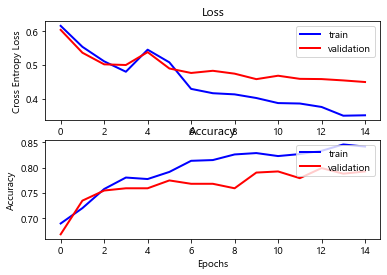

========= Eperiment -  optuna RNN w2v sg  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-543
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1336
           1       0.79      0.67      0.72       604

    accuracy                           0.84      1940
   macro avg       0.82      0.79      0.80      1940
weighted avg       0.84      0.84      0.84      1940

Predicted     0    1
Actual              
0          1226  110
1           201  403


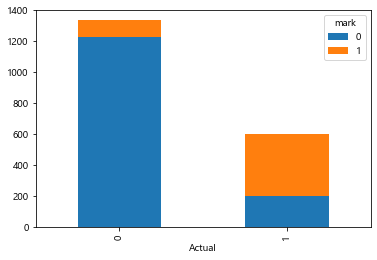

එන්න එන්න දැන් පරක්කු නෑ මුළ ටික හෙට එකෙන් අහමු ඊට පස්සේ ආයම
Predicted Label :  Not Hate  | Turth Label :  Not Hate

ඕකගේ ලාච්චුවේ දාපල්ලා නරුමයා
Predicted Label :  Hate  | Turth Label :  Hate

කන්න බොන්න දීලා කරට අත දාගෙන පිටිපස්සෙන් පිහියෙන් අනින සිස්ටම් එක තමයි පර්සි ලග තිබ්බෙ අන්තිමට පර්සි ලග හිටියා සුමනයා පර්සිටත් දුන්නෙ එවැනිම පාරක් තමයි හතර ගාතෙන් ඇදගෙන වැටෙන්න
Predicted Label :  Not Hate  | Turth Label :  Not Hate

කෝටි න් ගියත් ත්‍රී වීල් එකෙන් ගියත් යන්නෙ එකම පාරෙ නෙ බං කවදාහරි දවසක ඕකත් දිරලා වල පල්ලට යනවා කෝටි කින් කරන්න තව වැඩ කොච්චර නම් තියේද
Predicted Label :  Not Hate  | Turth Label :  Hate

ඒකි හිතන් ඇත්තේ අපිට පුපේ ඉත්තෑවෝ දුවනව කියලද දන්නෑ ෆේක් වලින් හරි ගිහින් එව්ව බලන්න
Predicted Label :  Not Hate  | Turth Label :  Hate

මේ තට්ටයව මුණ ගැහිලම විස්තරේ අහගනින් සියනෑවේ සිංහයා කියලා ඡන්දෙට ඉල්ලුවෙ සිංහයෙක් තියා හිවලෙක්වත් වෙන්න බෑ කියලා දැන් ඔප්පු වෙලා තියෙන්නෙ
Predicted Label :  Not Hate  | Turth Label :  Hate

සිවුරක් දමාගැනීම දමිත් අසංක පුක පෙන්වීම පිදුරංගල වීරයෝ සෙට

In [13]:
from keras.utils.vis_utils import plot_model
plot_model(rnn_model, to_file='rnn_model_plot.png', show_shapes=True, show_layer_names=True)
Y_pred = TC.model_evaluate(rnn_model,hist)
TC.save_predictions(Y_pred,TC.tag)

In [21]:
error_analysis(TC,rnn_model,Y_pred)

#### GRU
Study statistics: 

  Number of finished trials:  50
  
Best trial:

  Value:  0.3807172583165285
  Params: 
    layers: 1
    units: 32  try 64
    dropout_rates: 0.3
    recurrent_dropout_rates: 0.1
    activation: relu   try swish
    spatial_dropout: False
    LR: 0.001

In [22]:

TC.EPOCHS =50
TC.BATCH_SIZE =16
TC.lr = 0.001
TC.tag = "optuna GRU w2v sg"
TC.activation = 'relu'
TC.recurr_dropout = 0.1
TC.unit =32
TC.layer = 1
TC.dropout_rate = 0.3
gru_model = get_model(TC,"GRU")
gru_model, hist = TC.train_model(gru_model)

Build model
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 300)          6000000   
_________________________________________________________________
gru (GRU)                    (None, 100, 32)           31968     
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)   

train loss -  0.31363108797616995  train acc-  0.86279273
test loss -  0.38154216381077916  test acc-  0.8484536
Train acc: 0.863, Test acc: 0.848


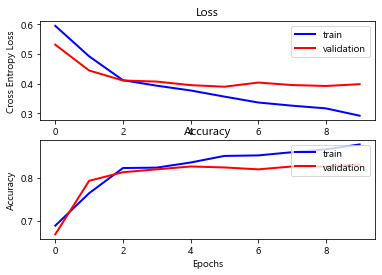

========= Eperiment -  optuna GRU w2v sg  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-544
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1336
           1       0.78      0.71      0.74       604

    accuracy                           0.85      1940
   macro avg       0.83      0.81      0.82      1940
weighted avg       0.85      0.85      0.85      1940

Predicted     0    1
Actual              
0          1218  118
1           176  428


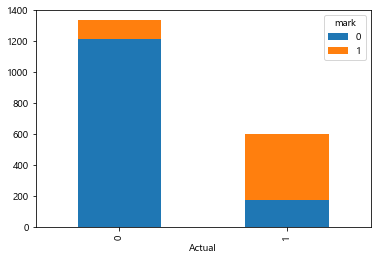

එන්න එන්න දැන් පරක්කු නෑ මුළ ටික හෙට එකෙන් අහමු ඊට පස්සේ ආයම
Predicted Label :  Not Hate  | Turth Label :  Not Hate

ඕකගේ ලාච්චුවේ දාපල්ලා නරුමයා
Predicted Label :  Hate  | Turth Label :  Hate

කන්න බොන්න දීලා කරට අත දාගෙන පිටිපස්සෙන් පිහියෙන් අනින සිස්ටම් එක තමයි පර්සි ලග තිබ්බෙ අන්තිමට පර්සි ලග හිටියා සුමනයා පර්සිටත් දුන්නෙ එවැනිම පාරක් තමයි හතර ගාතෙන් ඇදගෙන වැටෙන්න
Predicted Label :  Not Hate  | Turth Label :  Not Hate

කෝටි න් ගියත් ත්‍රී වීල් එකෙන් ගියත් යන්නෙ එකම පාරෙ නෙ බං කවදාහරි දවසක ඕකත් දිරලා වල පල්ලට යනවා කෝටි කින් කරන්න තව වැඩ කොච්චර නම් තියේද
Predicted Label :  Not Hate  | Turth Label :  Hate

ඒකි හිතන් ඇත්තේ අපිට පුපේ ඉත්තෑවෝ දුවනව කියලද දන්නෑ ෆේක් වලින් හරි ගිහින් එව්ව බලන්න
Predicted Label :  Not Hate  | Turth Label :  Hate

මේ තට්ටයව මුණ ගැහිලම විස්තරේ අහගනින් සියනෑවේ සිංහයා කියලා ඡන්දෙට ඉල්ලුවෙ සිංහයෙක් තියා හිවලෙක්වත් වෙන්න බෑ කියලා දැන් ඔප්පු වෙලා තියෙන්නෙ
Predicted Label :  Not Hate  | Turth Label :  Hate

සිවුරක් දමාගැනීම දමිත් අසංක පුක පෙන්වීම පිදුරංගල වීරයෝ සෙට

In [23]:
plot_model(gru_model, to_file='gru_model_plot.png', show_shapes=True, show_layer_names=True)
Y_pred = TC.model_evaluate(gru_model,hist)
TC.save_predictions(Y_pred,TC.tag)

In [ ]:
error_analysis(TC,gru_model,Y_pred)

#### LSTM

In [31]:
TC.EPOCHS =50
TC.BATCH_SIZE =16
TC.lr = 0.001
TC.tag = "optuna LSTM w2v sg"
TC.activation = 'tanh'
TC.recurr_dropout = 0.0
TC.unit =32
TC.layer = 0
TC.dropout_rate = 0.1
lstm_model = get_model(TC,"LSTM")
lstm_model, hist = TC.train_model(lstm_model)

Build model
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 300)          6000000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                42624     
_________________________________________________________________
dense_23 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_15 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 33        
Total params: 6,043,713
Trainable params: 43,713
Non-trainable params: 6,000,000
_________________________________________________________________
started training
Train on 4073 samples, validate on 453 samples
Epoch 1/50

Epoch 00001: val_

Unexpected error in ping thread.
Traceback (most recent call last):
  File "C:\Users\Kavishka\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 672, in urlopen
    chunked=chunked,
  File "C:\Users\Kavishka\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 421, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\Kavishka\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 416, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\Kavishka\anaconda3\lib\http\client.py", line 1344, in getresponse
    response.begin()
  File "C:\Users\Kavishka\anaconda3\lib\http\client.py", line 306, in begin
    version, status, reason = self._read_status()
  File "C:\Users\Kavishka\anaconda3\lib\http\client.py", line 267, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\Kavishka\anaconda3\lib\socket.py", line 589, in readinto
    return self._sock.recv_into

train loss -  0.6112053226012863  train acc-  0.6889085
test loss -  0.6066472198545318  test acc-  0.6886598
Train acc: 0.689, Test acc: 0.689


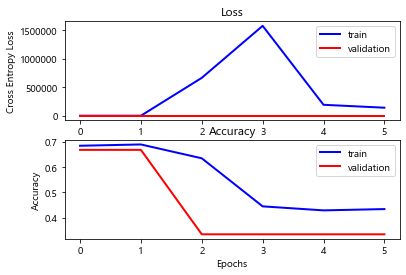

========= Eperiment -  optuna LSTM w2v sg  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-546


Invalid metric value: nan for channel positive_predictive_value. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel false_discovery_rate. Metrics with nan or +/-inf values will not be sent to server


              precision    recall  f1-score   support

           0       0.69      1.00      0.82      1336
           1       0.00      0.00      0.00       604

    accuracy                           0.69      1940
   macro avg       0.34      0.50      0.41      1940
weighted avg       0.47      0.69      0.56      1940

Predicted     0
Actual         
0          1336
1           604


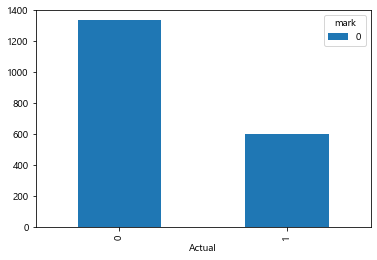

එන්න එන්න දැන් පරක්කු නෑ මුළ ටික හෙට එකෙන් අහමු ඊට පස්සේ ආයම
Predicted Label :  Not Hate  | Turth Label :  Not Hate

ඕකගේ ලාච්චුවේ දාපල්ලා නරුමයා
Predicted Label :  Not Hate  | Turth Label :  Hate

කන්න බොන්න දීලා කරට අත දාගෙන පිටිපස්සෙන් පිහියෙන් අනින සිස්ටම් එක තමයි පර්සි ලග තිබ්බෙ අන්තිමට පර්සි ලග හිටියා සුමනයා පර්සිටත් දුන්නෙ එවැනිම පාරක් තමයි හතර ගාතෙන් ඇදගෙන වැටෙන්න
Predicted Label :  Not Hate  | Turth Label :  Not Hate

කෝටි න් ගියත් ත්‍රී වීල් එකෙන් ගියත් යන්නෙ එකම පාරෙ නෙ බං කවදාහරි දවසක ඕකත් දිරලා වල පල්ලට යනවා කෝටි කින් කරන්න තව වැඩ කොච්චර නම් තියේද
Predicted Label :  Not Hate  | Turth Label :  Hate

ඒකි හිතන් ඇත්තේ අපිට පුපේ ඉත්තෑවෝ දුවනව කියලද දන්නෑ ෆේක් වලින් හරි ගිහින් එව්ව බලන්න
Predicted Label :  Not Hate  | Turth Label :  Hate

මේ තට්ටයව මුණ ගැහිලම විස්තරේ අහගනින් සියනෑවේ සිංහයා කියලා ඡන්දෙට ඉල්ලුවෙ සිංහයෙක් තියා හිවලෙක්වත් වෙන්න බෑ කියලා දැන් ඔප්පු වෙලා තියෙන්නෙ
Predicted Label :  Not Hate  | Turth Label :  Hate

සිවුරක් දමාගැනීම දමිත් අසංක පුක පෙන්වීම පිදුරංගල වීරයෝ

In [28]:
Y_pred = TC.model_evaluate(lstm_model,hist)
TC.save_predictions(Y_pred,TC.tag)

In [29]:
error_analysis(TC,lstm_model,Y_pred)

#### Bidirection LSTM

In [ ]:
TC_W.EPOCHS =50
TC_W.BATCH_SIZE =16
TC_W.lr = 0.0001
TC_W.tag = "BiGRU w2v-sg lr-0.0001"
bigru_model = get_model(TC_W,"BiGRU")

bigru_model, hist = TC_W.train_model(bigru_model)

#### BiGRU

In [7]:

TC.EPOCHS =50
TC.BATCH_SIZE =16
TC.lr = 0.001
TC.tag = "optuna BiGRU w2v sg"
TC.activation = 'relu'
TC.recurr_dropout = 0.1
TC.unit =32
TC.layer = 1
TC.dropout_rate = 0.3
bigru_model = get_model(TC,"BiGRU")
bigru_model, hist = TC.train_model(bigru_model)

Build model
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 300)          6000000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100, 64)           63936     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                18624     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)   

train loss -  0.28631385024990913  train acc-  0.8762704
test loss -  0.38651899176160087  test acc-  0.8417526
Train acc: 0.876, Test acc: 0.842


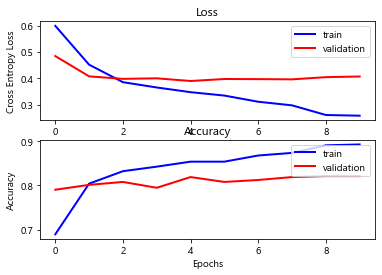

========= Eperiment -  optuna BiGRU w2v sg  =========


Info (NVML): NVML Shared Library Not Found. GPU usage metrics may not be reported. For more information, see https://docs-legacy.neptune.ai/logging-and-managing-experiment-results/logging-experiment-data.html#hardware-consumption 


https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-547
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1336
           1       0.78      0.69      0.73       604

    accuracy                           0.84      1940
   macro avg       0.82      0.80      0.81      1940
weighted avg       0.84      0.84      0.84      1940

Predicted     0    1
Actual              
0          1217  119
1           188  416


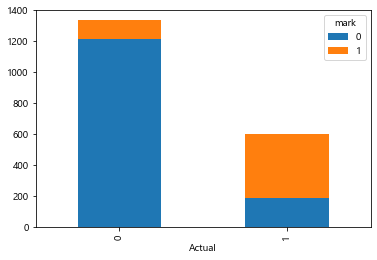

එන්න එන්න දැන් පරක්කු නෑ මුළ ටික හෙට එකෙන් අහමු ඊට පස්සේ ආයම
Predicted Label :  Not Hate  | Turth Label :  Not Hate

ඕකගේ ලාච්චුවේ දාපල්ලා නරුමයා
Predicted Label :  Hate  | Turth Label :  Hate

කන්න බොන්න දීලා කරට අත දාගෙන පිටිපස්සෙන් පිහියෙන් අනින සිස්ටම් එක තමයි පර්සි ලග තිබ්බෙ අන්තිමට පර්සි ලග හිටියා සුමනයා පර්සිටත් දුන්නෙ එවැනිම පාරක් තමයි හතර ගාතෙන් ඇදගෙන වැටෙන්න
Predicted Label :  Not Hate  | Turth Label :  Not Hate

කෝටි න් ගියත් ත්‍රී වීල් එකෙන් ගියත් යන්නෙ එකම පාරෙ නෙ බං කවදාහරි දවසක ඕකත් දිරලා වල පල්ලට යනවා කෝටි කින් කරන්න තව වැඩ කොච්චර නම් තියේද
Predicted Label :  Not Hate  | Turth Label :  Hate

ඒකි හිතන් ඇත්තේ අපිට පුපේ ඉත්තෑවෝ දුවනව කියලද දන්නෑ ෆේක් වලින් හරි ගිහින් එව්ව බලන්න
Predicted Label :  Not Hate  | Turth Label :  Hate

මේ තට්ටයව මුණ ගැහිලම විස්තරේ අහගනින් සියනෑවේ සිංහයා කියලා ඡන්දෙට ඉල්ලුවෙ සිංහයෙක් තියා හිවලෙක්වත් වෙන්න බෑ කියලා දැන් ඔප්පු වෙලා තියෙන්නෙ
Predicted Label :  Not Hate  | Turth Label :  Hate

සිවුරක් දමාගැනීම දමිත් අසංක පුක පෙන්වීම පිදුරංගල වීරයෝ සෙට

In [9]:
from keras.utils.vis_utils import plot_model
plot_model(bigru_model, to_file='bigru_model_plot.png', show_shapes=True, show_layer_names=True)
Y_pred = TC.model_evaluate(bigru_model,hist)
TC.save_predictions(Y_pred,TC.tag)

#### BiDirectional LSTM + CNN

In [ ]:
TC_W.EPOCHS =50
TC_W.BATCH_SIZE =16
TC_W.lr = 0.0001
TC_W.tag = "BiLSTM CNN w2v-sg lr-0.0001"
bilstm_cnn_model = build_model(TC_W)

bilstm_cnn_model, hist = TC_W.train_model(bilstm_cnn_model)

In [ ]:
Y_pred = TC_W.model_evaluate(bilstm_cnn_model,hist)
TC_W.save_predictions(Y_pred,TC_W.tag)

#### BiGRU + CNN

In [12]:

TC.EPOCHS =50
TC.BATCH_SIZE =16
TC.lr = 0.001
TC.tag = "optuna BiGRU  CNN w2v sg"
TC.activation = 'relu'
TC.recurr_dropout = 0.1
TC.unit =32
TC.layer = 1
TC.dropout_rate = 0.3
grucnn_model = build_model(TC)
grucnn_model, hist = TC.train_model(grucnn_model)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 300)          6000000   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 100, 64)           63936     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 100, 64)           18624     
_________________________________________________________________
conv1d (Conv1D)              (None, 97, 32)            8224      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

train loss -  0.24398888718670994  train acc-  0.90388864
test loss -  0.3738687886405237  test acc-  0.8469072
Train acc: 0.904, Test acc: 0.847


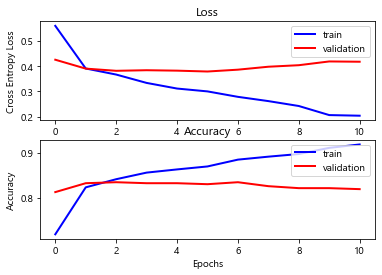

========= Eperiment -  optuna BiGRU  CNN w2v sg  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-548
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1336
           1       0.78      0.71      0.74       604

    accuracy                           0.85      1940
   macro avg       0.83      0.81      0.82      1940
weighted avg       0.84      0.85      0.84      1940

Predicted     0    1
Actual              
0          1213  123
1           174  430


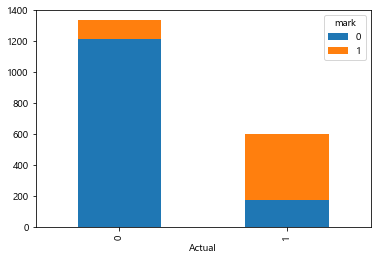

එන්න එන්න දැන් පරක්කු නෑ මුළ ටික හෙට එකෙන් අහමු ඊට පස්සේ ආයම
Predicted Label :  Not Hate  | Turth Label :  Not Hate

ඕකගේ ලාච්චුවේ දාපල්ලා නරුමයා
Predicted Label :  Hate  | Turth Label :  Hate

කන්න බොන්න දීලා කරට අත දාගෙන පිටිපස්සෙන් පිහියෙන් අනින සිස්ටම් එක තමයි පර්සි ලග තිබ්බෙ අන්තිමට පර්සි ලග හිටියා සුමනයා පර්සිටත් දුන්නෙ එවැනිම පාරක් තමයි හතර ගාතෙන් ඇදගෙන වැටෙන්න
Predicted Label :  Hate  | Turth Label :  Not Hate

කෝටි න් ගියත් ත්‍රී වීල් එකෙන් ගියත් යන්නෙ එකම පාරෙ නෙ බං කවදාහරි දවසක ඕකත් දිරලා වල පල්ලට යනවා කෝටි කින් කරන්න තව වැඩ කොච්චර නම් තියේද
Predicted Label :  Not Hate  | Turth Label :  Hate

ඒකි හිතන් ඇත්තේ අපිට පුපේ ඉත්තෑවෝ දුවනව කියලද දන්නෑ ෆේක් වලින් හරි ගිහින් එව්ව බලන්න
Predicted Label :  Not Hate  | Turth Label :  Hate

මේ තට්ටයව මුණ ගැහිලම විස්තරේ අහගනින් සියනෑවේ සිංහයා කියලා ඡන්දෙට ඉල්ලුවෙ සිංහයෙක් තියා හිවලෙක්වත් වෙන්න බෑ කියලා දැන් ඔප්පු වෙලා තියෙන්නෙ
Predicted Label :  Hate  | Turth Label :  Hate

සිවුරක් දමාගැනීම දමිත් අසංක පුක පෙන්වීම පිදුරංගල වීරයෝ සෙට් එකම එක

In [14]:
from keras.utils.vis_utils import plot_model
plot_model(grucnn_model, to_file='bigru_cnn_model_plot.png', show_shapes=True, show_layer_names=True)
Y_pred = TC.model_evaluate(grucnn_model,hist)
TC.save_predictions(Y_pred,TC.tag)